# Лабораторная работа №8
-----------------------
**Классификация (Линейный дискриминантный анализ, метод опорных векторов)**

----------------------- 

## Цель:
Ознакомиться с методами классификации модуля Sklearn

## Выполнение

### imports

In [24]:
import pandas as pd
import numpy  as np

from sklearn import preprocessing
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

### Загрузка данных

In [21]:
data = pd.read_csv('iris.data', header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
X = data.iloc[:,:4].to_numpy()
labels = data.iloc[:,4].to_numpy()

np.unique(labels)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
Y = preprocessing.LabelEncoder().fit_transform(labels)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

In [18]:
def plot_classifier(classifier, title=""):
    if (not title):
        title = type(classifier).__name__
    
    test_size_range = np.arange(0.05, 0.95, 0.05)
    wrong_classified = []
    accuracy = []

    for test_size in test_size_range:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=830303)
        Y_pred = classifier.fit(X_train, Y_train).predict(X_test)
        wrong_classified.append((Y_test != Y_pred).sum())
        accuracy.append(classifier.score(X_test, Y_test))

    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle(title)

    axs[0].plot(test_size_range, wrong_classified)
    axs[0].set_ylabel("Wrong classified")
    axs[0].set_xlabel("Test size")
    axs[0].grid("both")

    axs[1].plot(test_size_range, accuracy)
    axs[1].set_ylabel("Accuracy")
    axs[1].set_xlabel("Test size")

    plt.show()

### Линейный дискриминантный анализ

In [17]:
lda = LinearDiscriminantAnalysis()
Y_pred = lda.fit(X_train, Y_train).predict(X_test)
print(f'{(Y_test != Y_pred).sum()=}') 
print(f'{lda.score(X_test, Y_test)=}')


(Y_test != Y_pred).sum()=3
lda.score(X_test, Y_test)=0.96


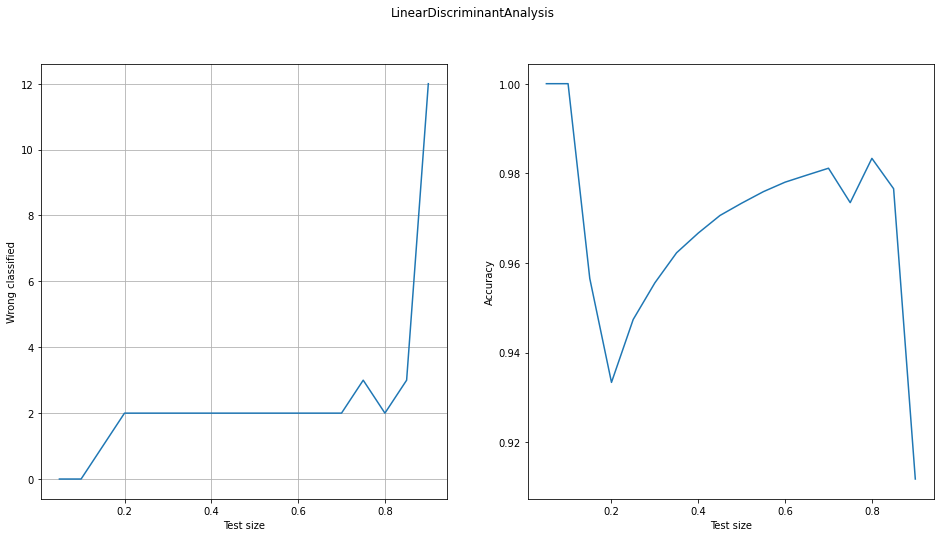

In [20]:
plot_classifier(lda)

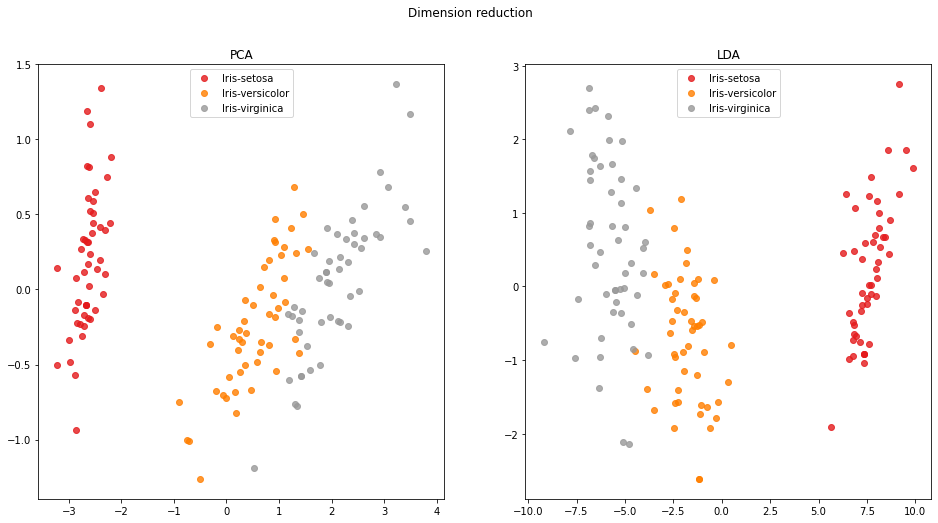

In [37]:
lda = LinearDiscriminantAnalysis(n_components=2)

X_2d_pca = PCA(n_components=2).fit_transform(X)
X_2d_lda = lda.fit_transform(X, Y)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Dimension reduction")
colors = [plt.cm.Set1(each) for each in np.linspace(0, 1, len(np.unique(Y)))]

for c, k in zip(colors, np.unique(Y)):
    class_data = X_2d_pca[Y==k]
    class_name = np.unique(labels[Y==k])[0]
    axs[0].scatter(class_data[:,0], class_data[:,1], color=c, alpha=.8, label=class_name)
axs[0].legend(loc="upper center", scatterpoints=1)
axs[0].set_title("PCA")

for c, k in zip(colors, np.unique(Y)):
    class_data = X_2d_lda[Y==k]
    class_name = np.unique(labels[Y==k])[0]
    axs[1].scatter(class_data[:,0], class_data[:,1], color=c, alpha=.8, label=class_name)
axs[1].legend(loc="upper center", scatterpoints=1)
axs[1].set_title("LDA")

plt.show()

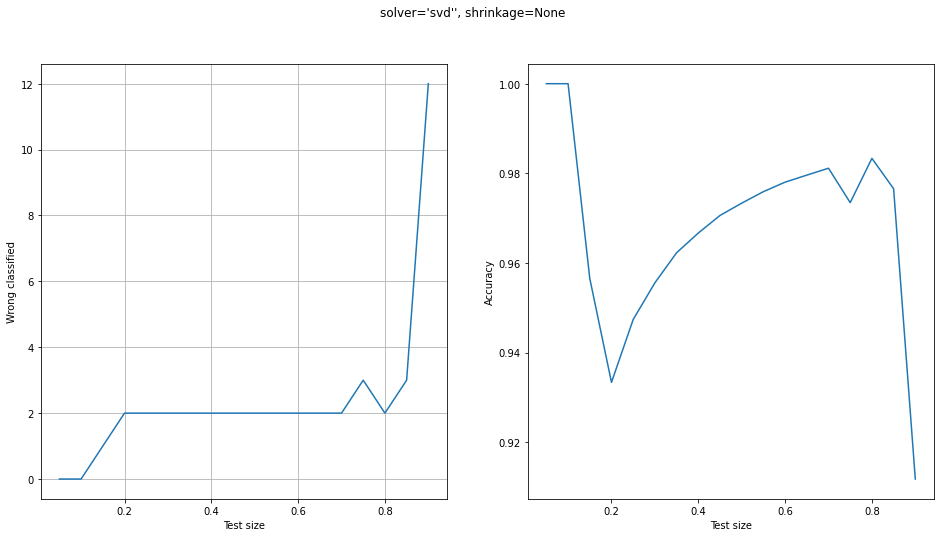

In [41]:
solver='svd'
plot_classifier(
    LinearDiscriminantAnalysis(solver=solver, shrinkage=None),
    f"{solver=}', shrinkage=None"
)

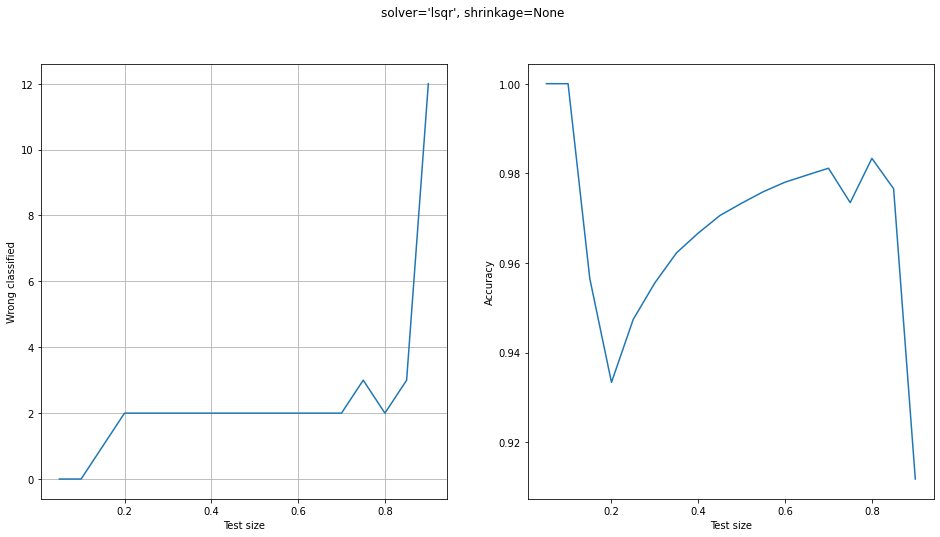

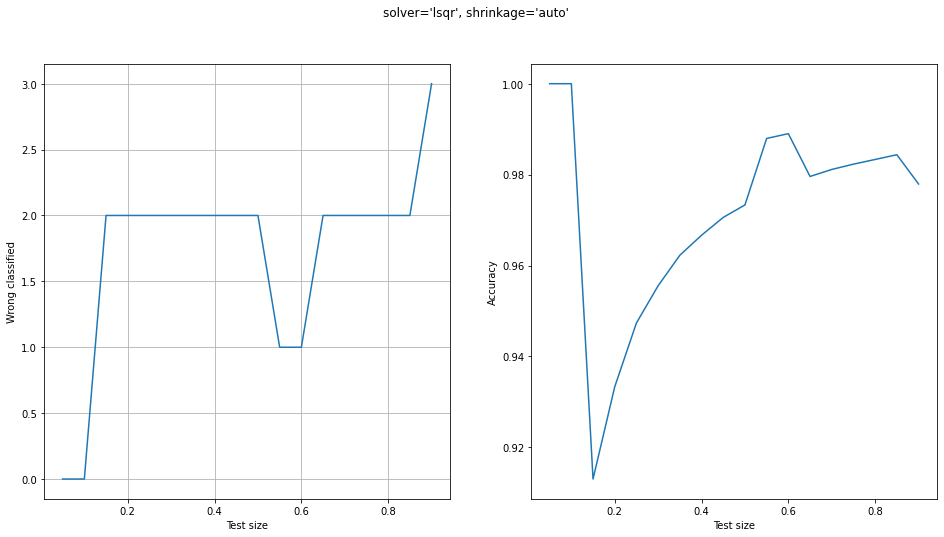

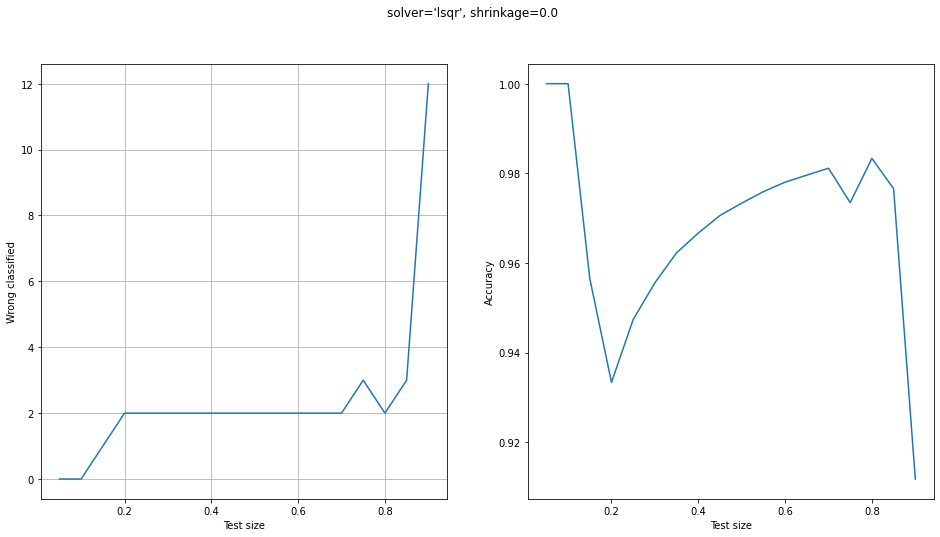

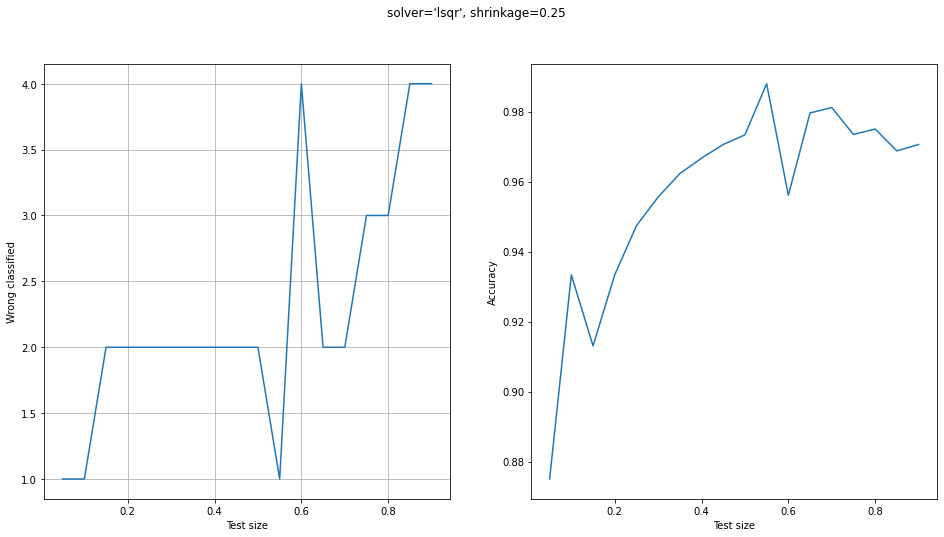

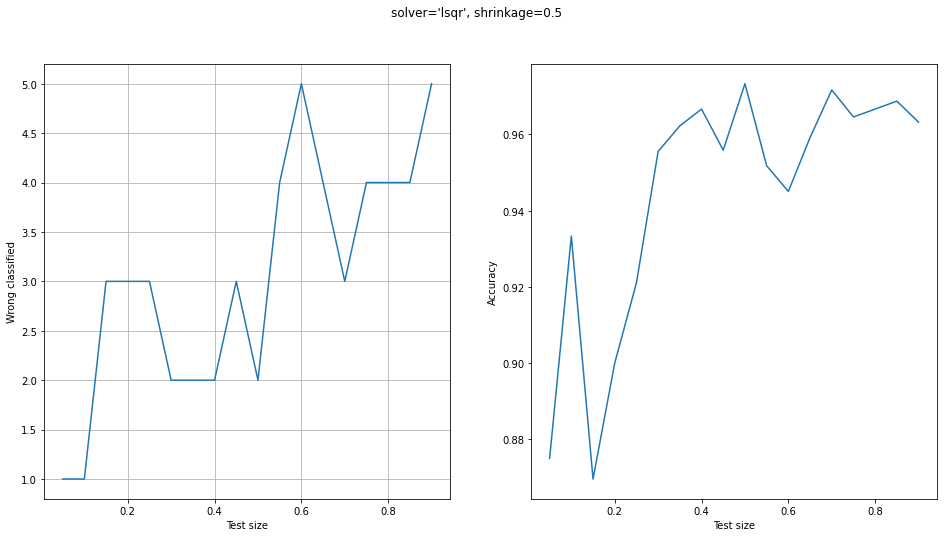

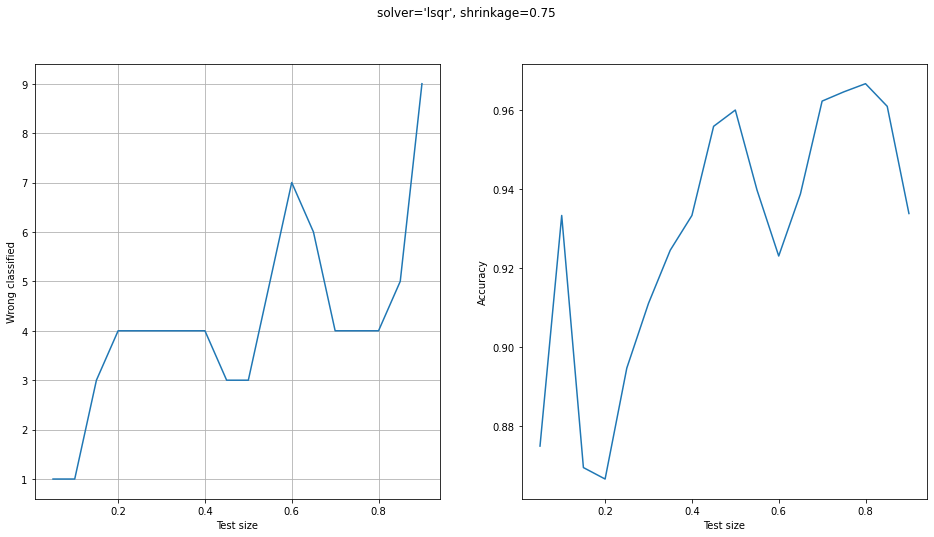

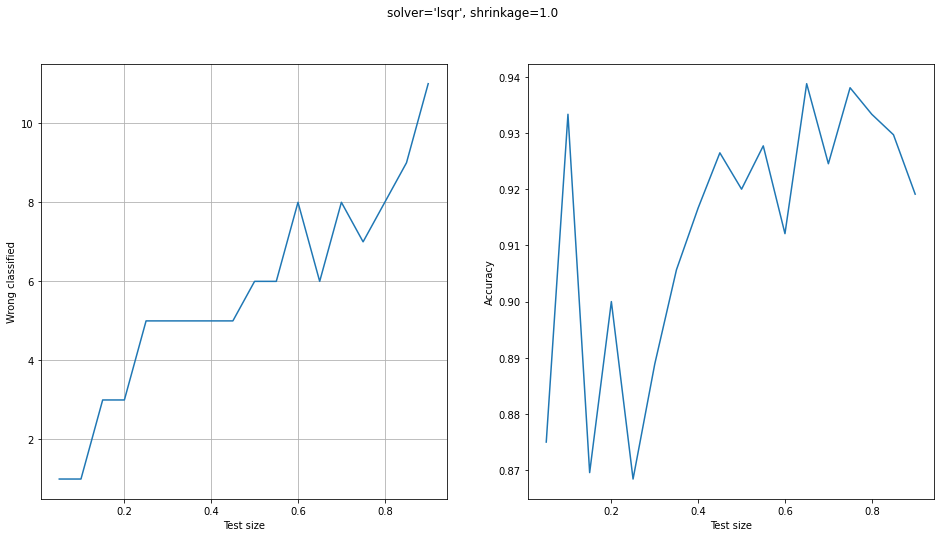

In [42]:
solver='lsqr'
plot_classifier(
    LinearDiscriminantAnalysis(solver=solver, shrinkage=None),
    f"{solver=}, shrinkage=None"
)

plot_classifier(
    LinearDiscriminantAnalysis(solver=solver, shrinkage='auto'),
    f"{solver=}, shrinkage='auto'"
)

for shrinkage in np.linspace(0, 1, 5):
    plot_classifier(
        LinearDiscriminantAnalysis(solver=solver, shrinkage=shrinkage),
        f"{solver=}, {shrinkage=}"
    )

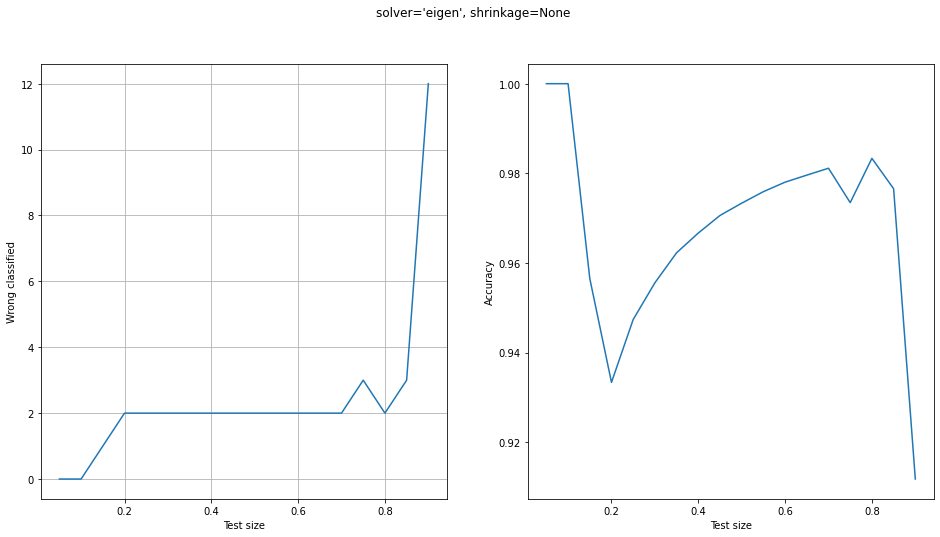

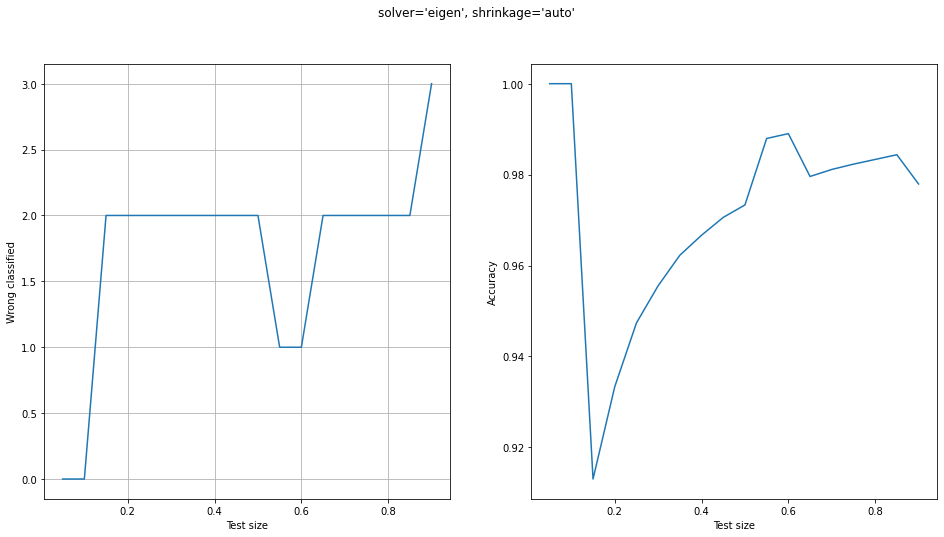

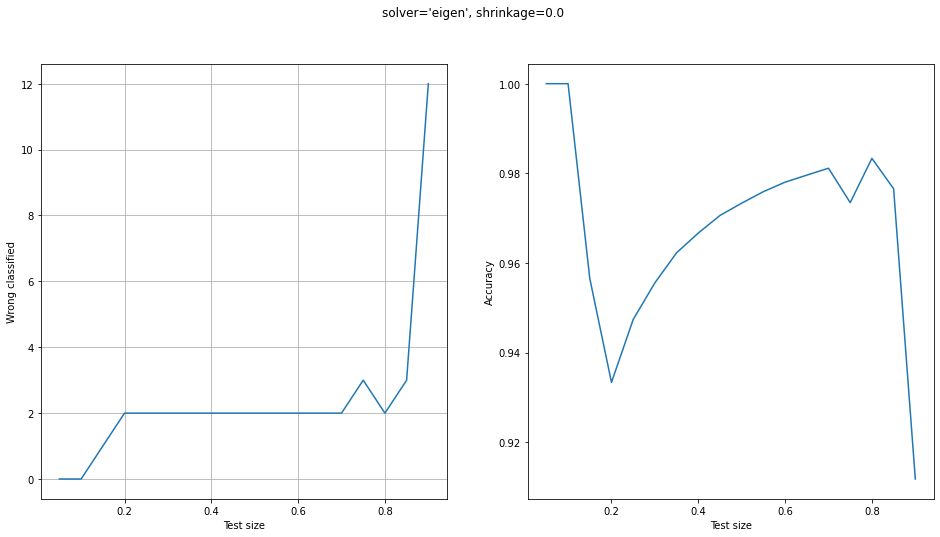

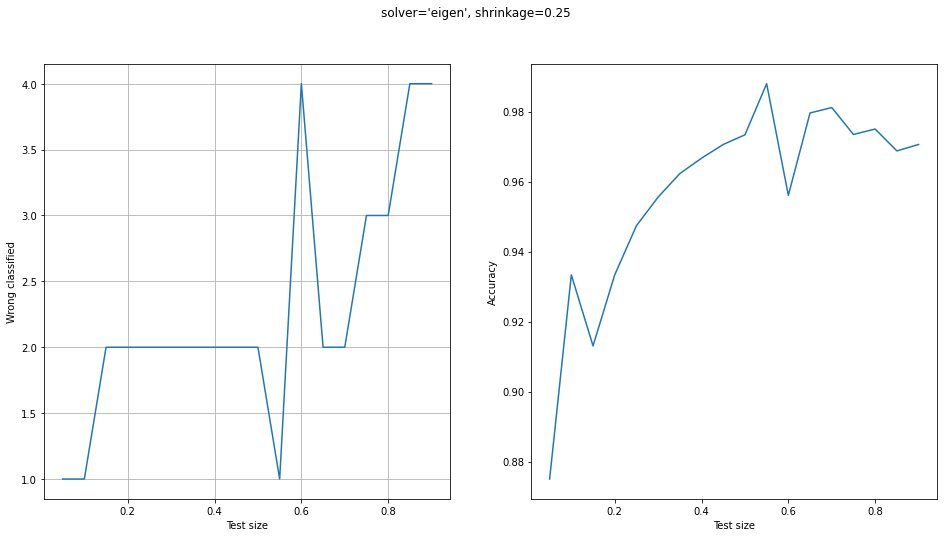

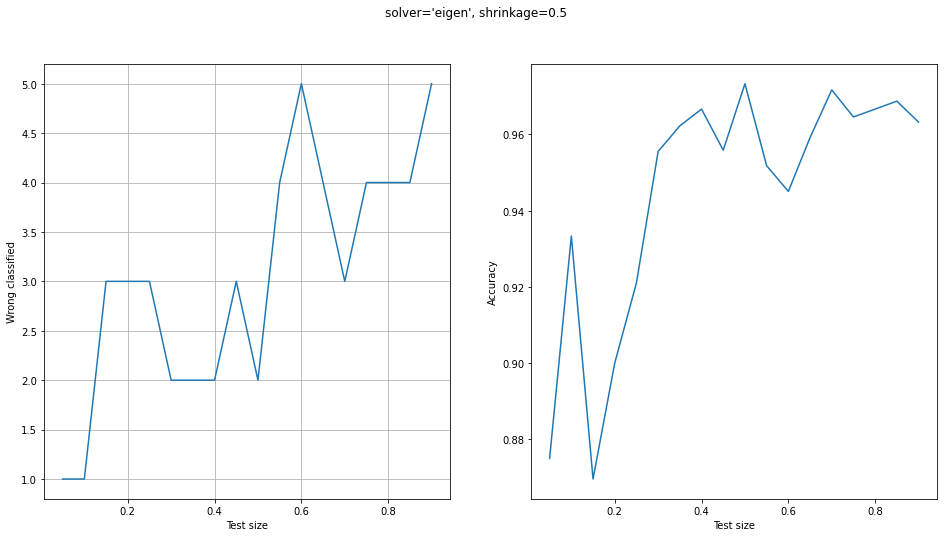

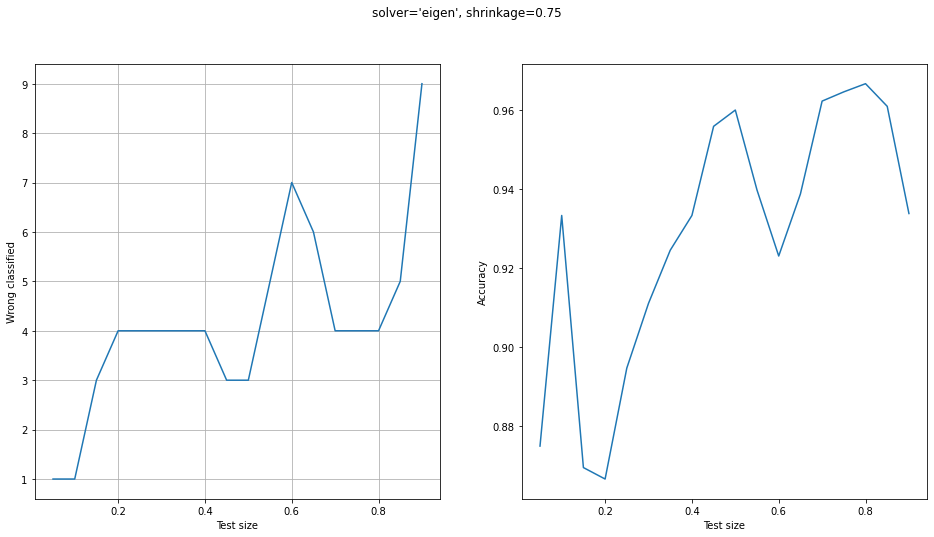

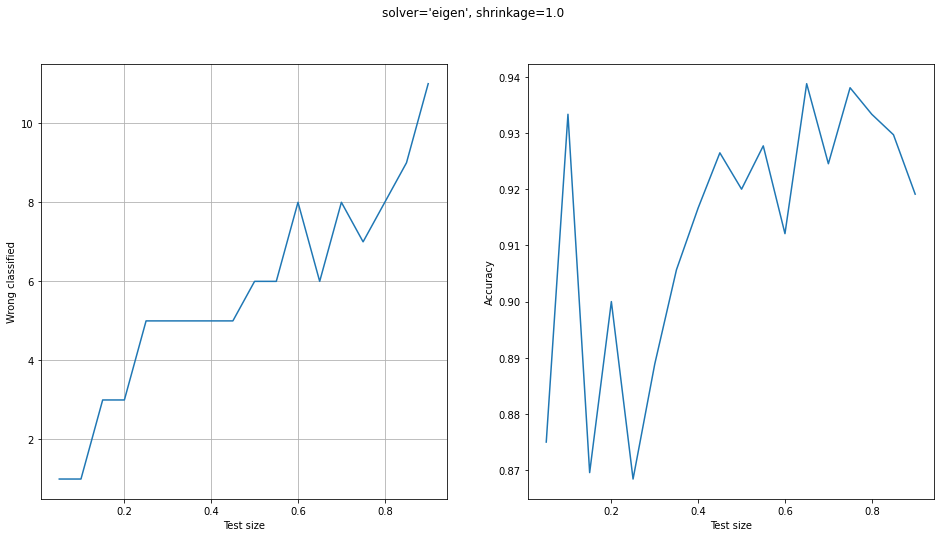

In [43]:
solver='eigen'
plot_classifier(
    LinearDiscriminantAnalysis(solver=solver, shrinkage=None),
    f"{solver=}, shrinkage=None"
)

plot_classifier(
    LinearDiscriminantAnalysis(solver=solver, shrinkage='auto'),
    f"{solver=}, shrinkage='auto'"
)

for shrinkage in np.linspace(0, 1, 5):
    plot_classifier(
        LinearDiscriminantAnalysis(solver=solver, shrinkage=shrinkage),
        f"{solver=}, {shrinkage=}"
    )

(Y_test != Y_pred).sum()=4
lda_priors.priors_=array([0.15, 0.7 , 0.15])


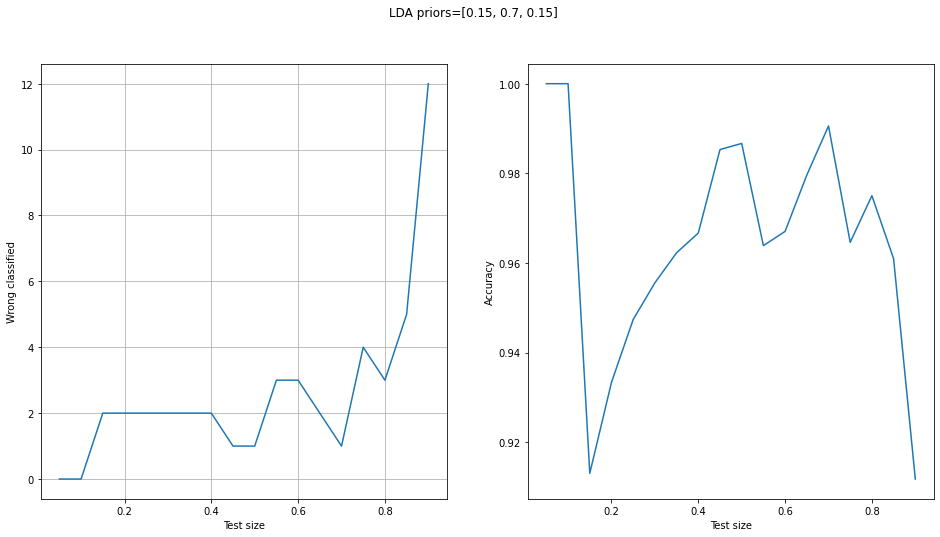

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

lda_priors = LinearDiscriminantAnalysis(priors=[0.15, 0.7, 0.15])
Y_pred = lda_priors.fit(X_train, Y_train).predict(X_test)

print(f"{(Y_test != Y_pred).sum()=}")
print(f"{lda_priors.priors_=}")

plot_classifier(lda_priors, "LDA priors=[0.15, 0.7, 0.15]")

### Метод опорных векторов

In [11]:
svc = svm.SVC()
Y_pred = svc.fit(X_train, Y_train).predict(X_test)

print(f'{(Y_test != Y_pred).sum()=}')
print(f'{svc.score(X_test, Y_test)=}')

(Y_test != Y_pred).sum()=3
svc.score(X_test, Y_test)=0.96


In [12]:
print(svc.support_vectors_)
print(svc.support_)
print(svc.n_support_)

[[5.  3.  1.6 0.2]
 [4.8 3.4 1.9 0.2]
 [5.1 3.8 1.9 0.4]
 [4.5 2.3 1.3 0.3]
 [5.1 3.3 1.7 0.5]
 [5.7 3.8 1.7 0.3]
 [6.1 2.8 4.  1.3]
 [5.  2.  3.5 1. ]
 [5.  2.3 3.3 1. ]
 [5.7 3.  4.2 1.2]
 [5.7 2.8 4.5 1.3]
 [5.5 2.4 3.7 1. ]
 [6.  2.7 5.1 1.6]
 [5.9 3.2 4.8 1.8]
 [6.3 3.3 4.7 1.6]
 [6.1 2.8 4.7 1.2]
 [6.  2.2 4.  1. ]
 [6.4 3.2 4.5 1.5]
 [6.6 2.9 4.6 1.3]
 [7.  3.2 4.7 1.4]
 [6.7 3.1 4.4 1.4]
 [5.1 2.5 3.  1.1]
 [6.7 3.  5.2 2.3]
 [6.9 3.1 5.4 2.1]
 [6.5 3.  5.2 2. ]
 [6.5 3.2 5.1 2. ]
 [6.3 2.5 5.  1.9]
 [4.9 2.5 4.5 1.7]
 [6.9 3.1 5.1 2.3]
 [6.7 2.5 5.8 1.8]
 [6.4 3.1 5.5 1.8]
 [5.8 2.7 5.1 1.9]
 [5.6 2.8 4.9 2. ]
 [7.9 3.8 6.4 2. ]
 [6.2 3.4 5.4 2.3]
 [6.3 2.7 4.9 1.8]]
[ 7  9 12 13 26 27  5  8 15 16 18 25 30 35 38 42 50 53 60 68 70 72  3 14
 19 23 34 39 48 49 56 61 64 67 71 73]
[ 6 16 14]


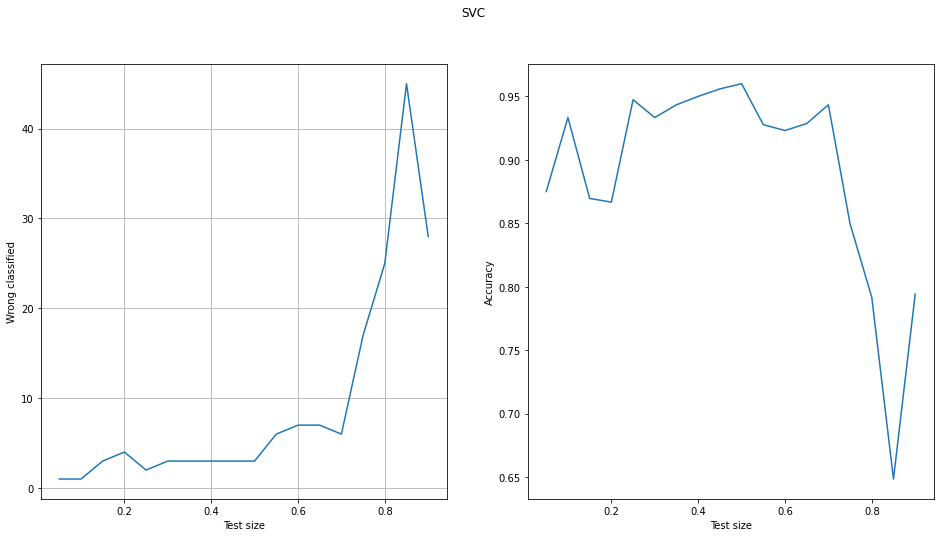

In [47]:
plot_classifier(svc)

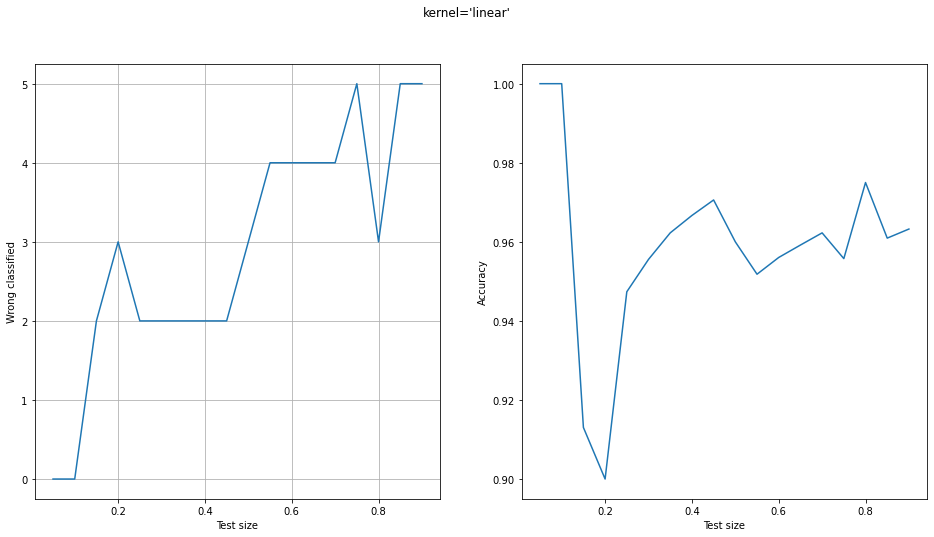

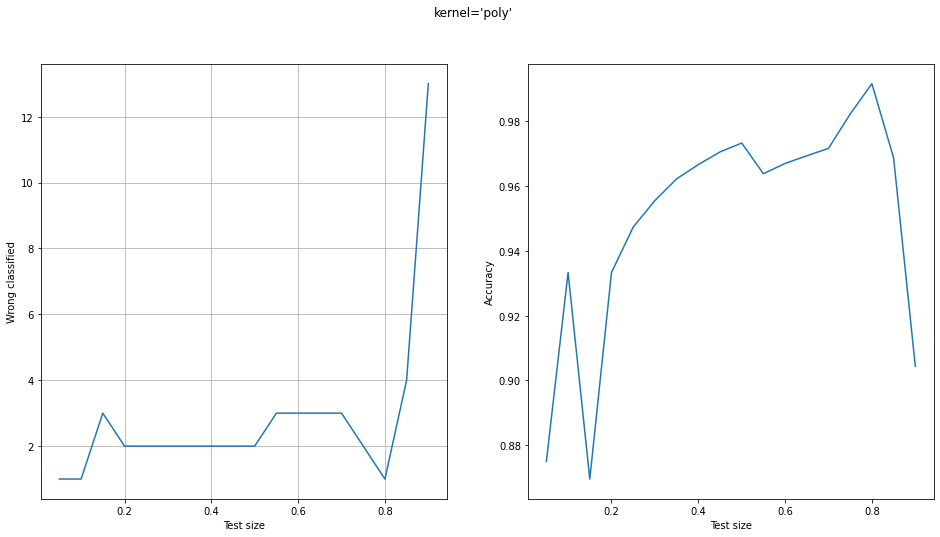

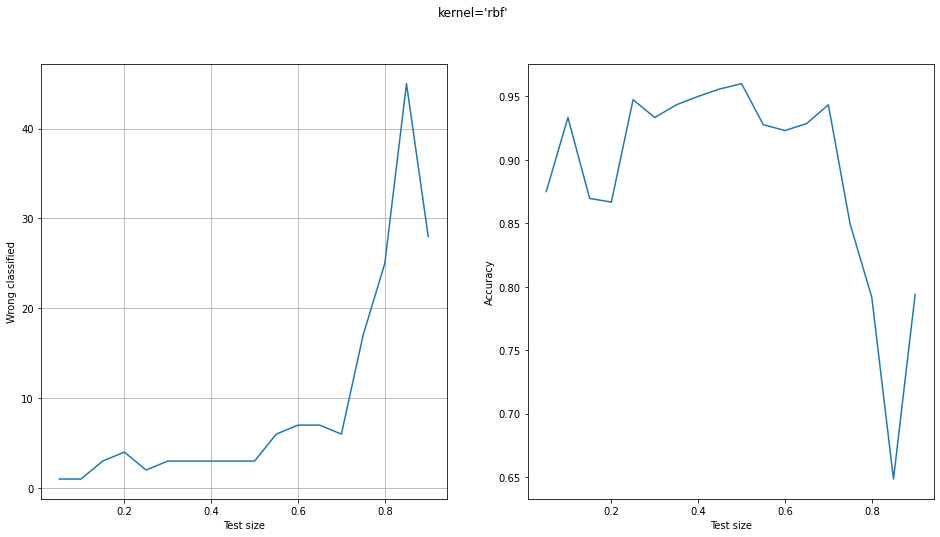

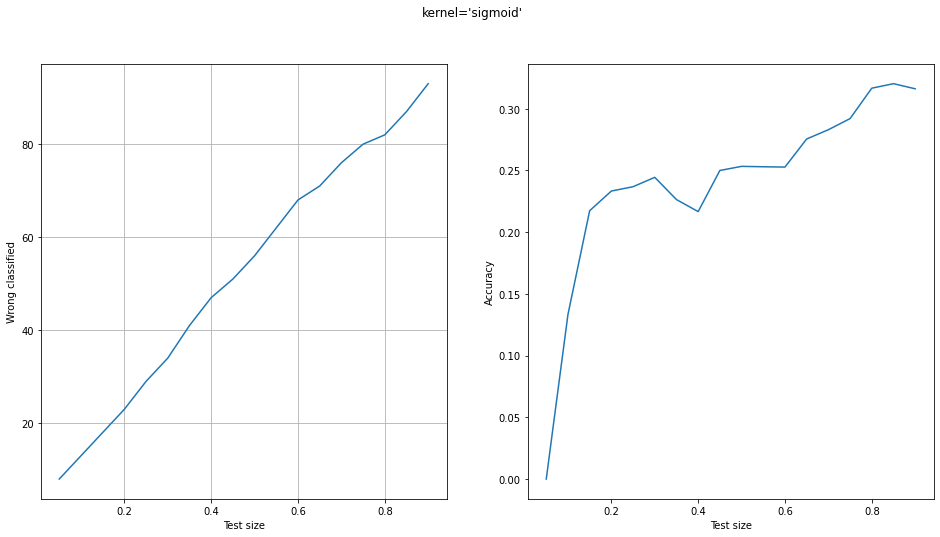

In [48]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    plot_classifier(
        svm.SVC(kernel=kernel),
        f"{kernel=}"
    )

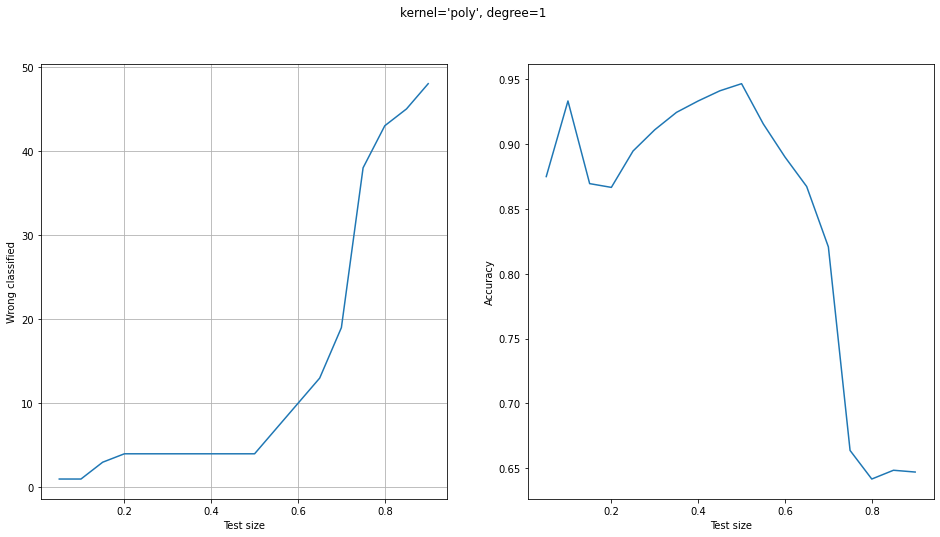

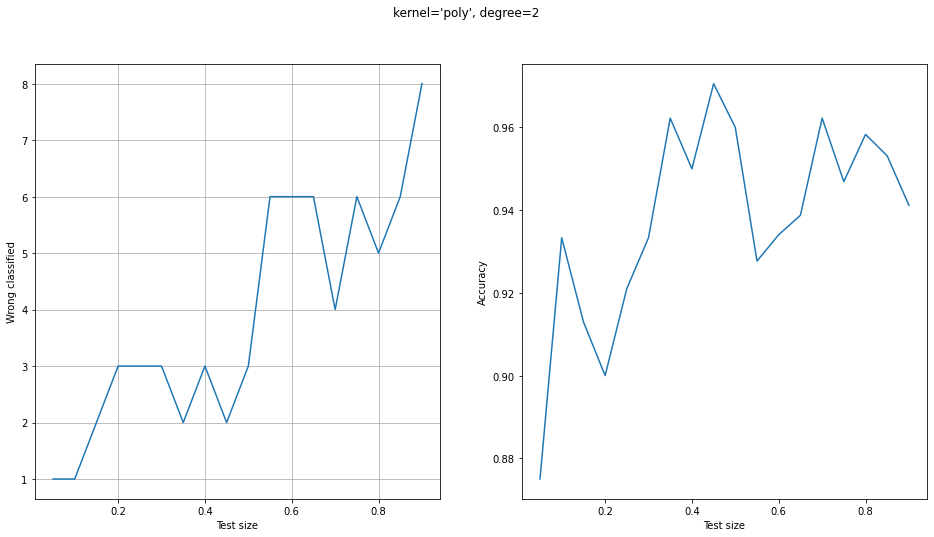

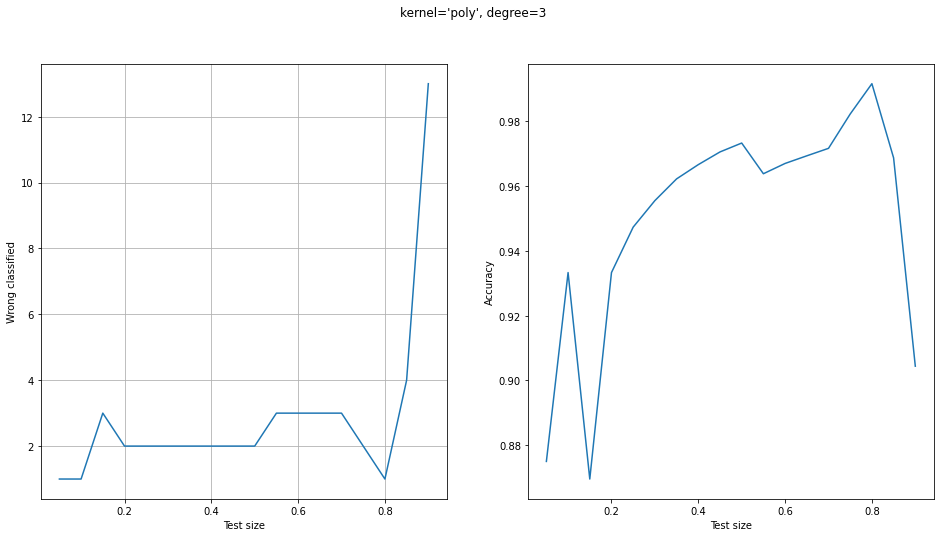

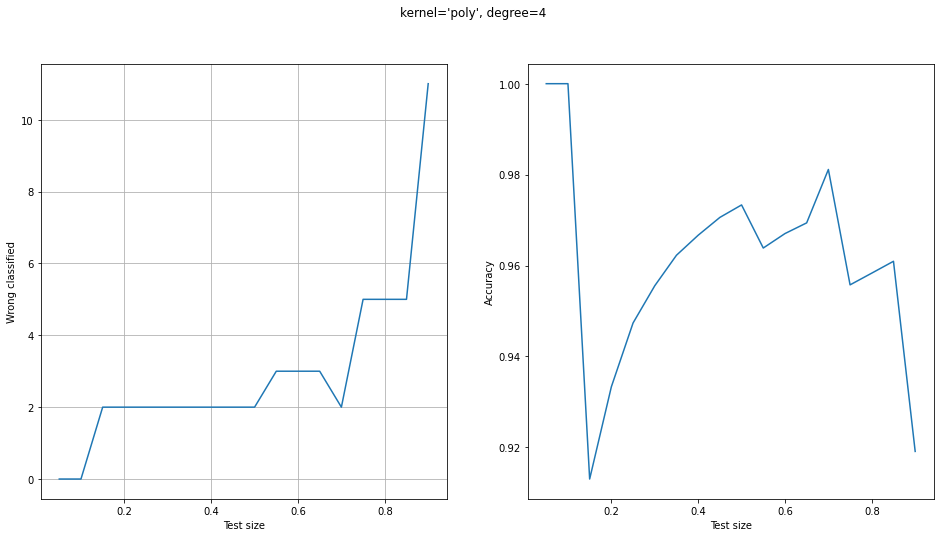

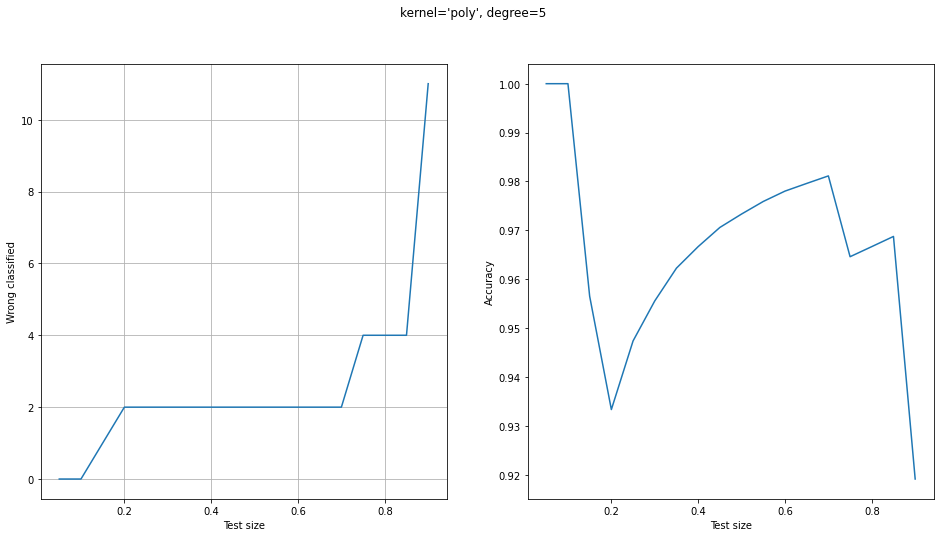

In [51]:
for degree in np.arange(1, 6, 1):
    plot_classifier(
        svm.SVC(kernel="poly", degree=degree),
        f"kernel='poly', {degree=}"
    )

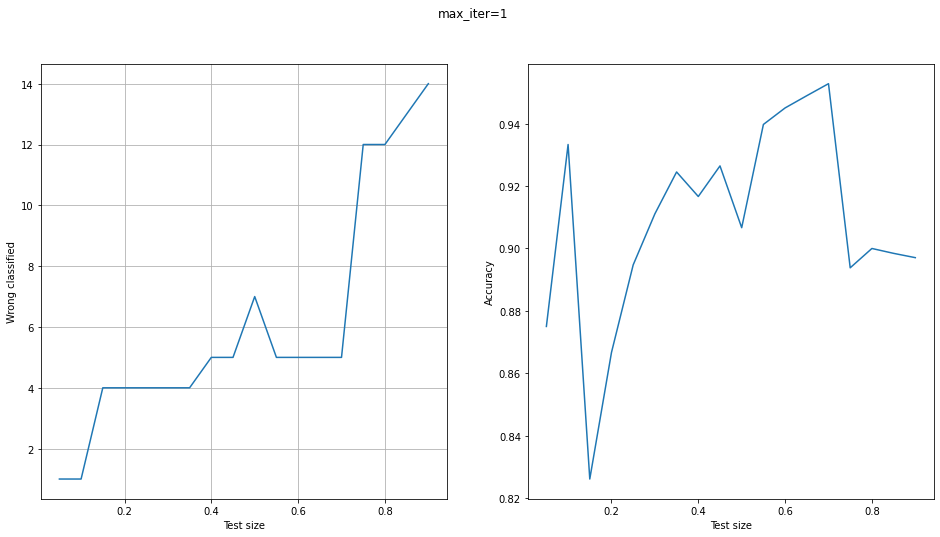

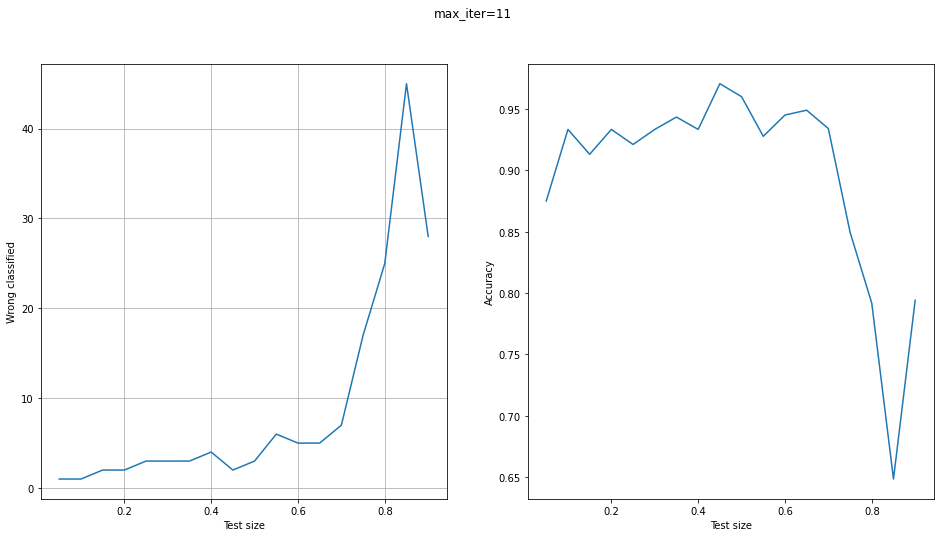

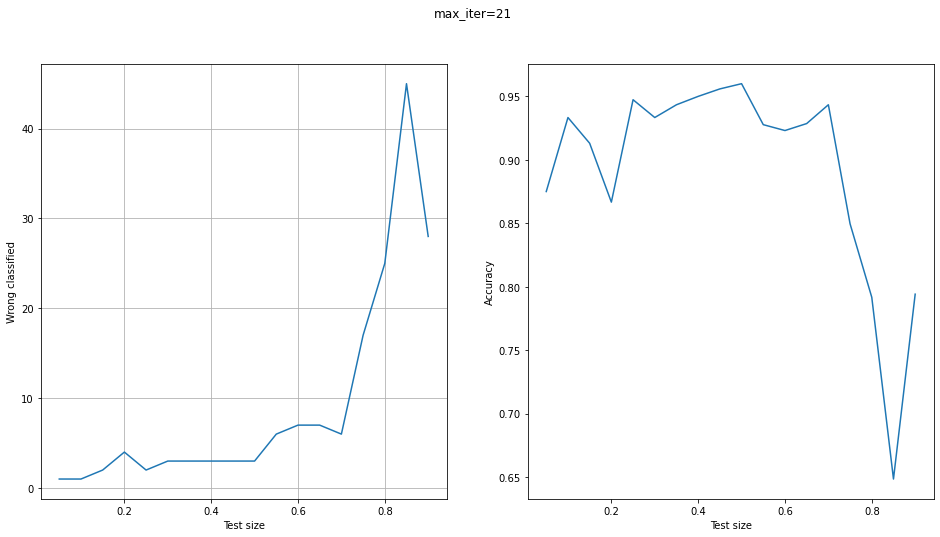

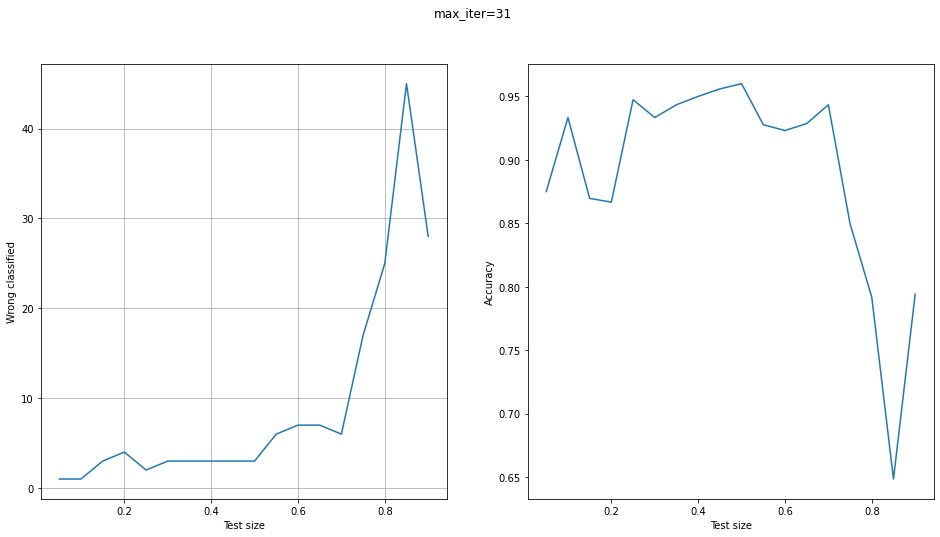

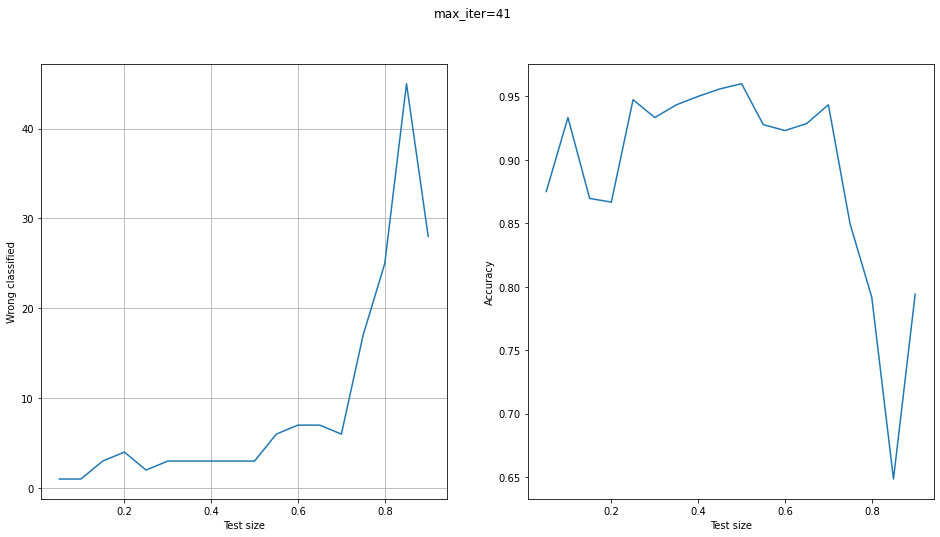

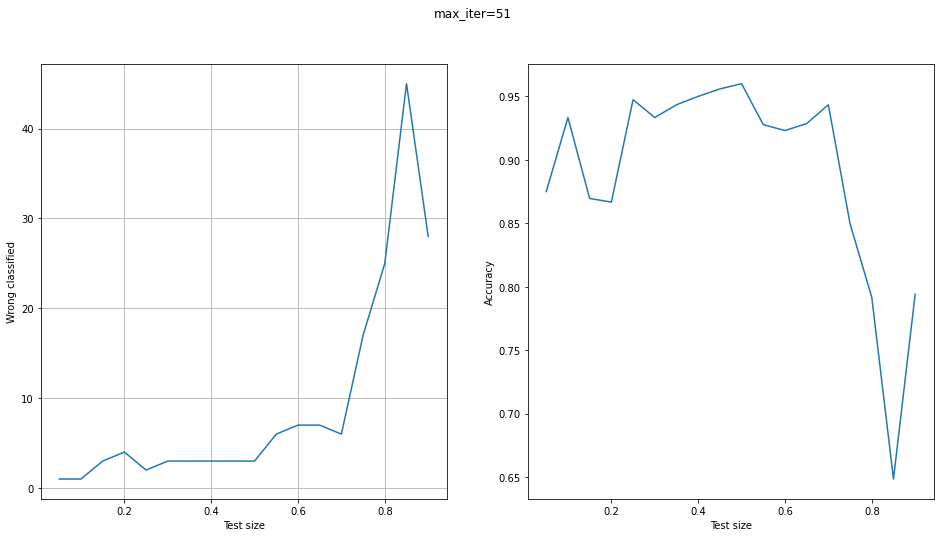

In [56]:
import warnings
warnings.filterwarnings("ignore")
for max_iter in np.arange(1, 60, 10):
    plot_classifier(
        svm.SVC(max_iter=max_iter),
        f"{max_iter=}"
    )
warnings.filterwarnings("default")

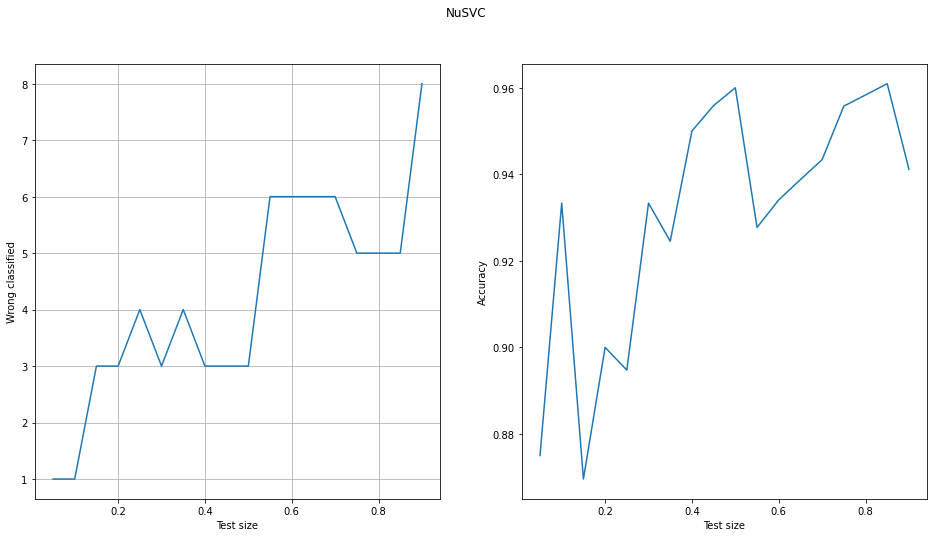

In [64]:
plot_classifier(
    svm.NuSVC()
)

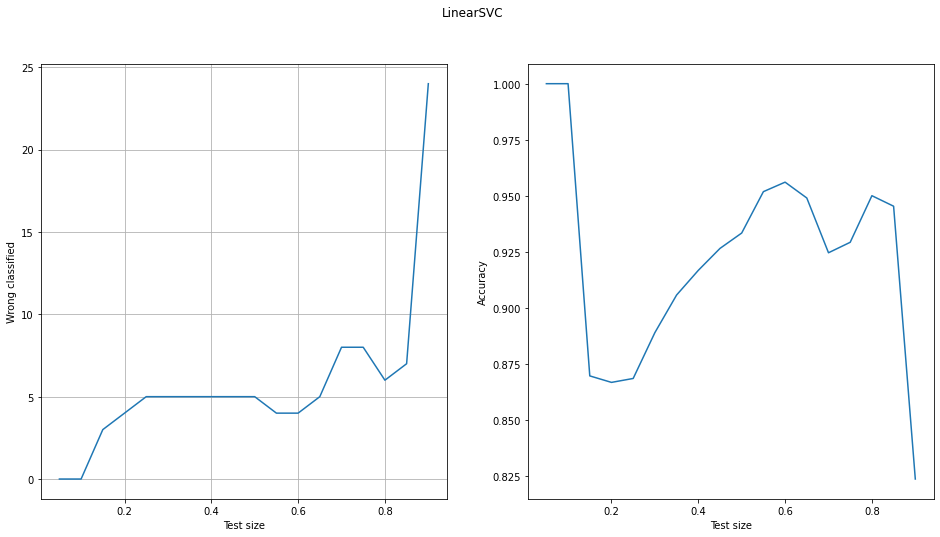

In [61]:
plot_classifier(
    svm.LinearSVC(max_iter=10000)
)